# Sampling

## Confidence Interval
- Interpret of a  confidence interval:<br>
  There is a 95% chance that the confidence interval of contains the true population mean.

<details>

- A range of values that likely contains the true population parameter $\mu$, such as the mean $\bar{x}$ or proportion, with a specified level of confidence ($1-\alpha$). 
- It provides a measure of the uncertainty associated with estimating a population parameter from a sample.
- For example, if you calculate a 95% confidence interval for the mean, it means that if you were to sample from the population multiple times and calculate the mean each time, approximately 95% of those intervals would contain the true population mean.

$$\bar{x} - \left(\text{c × sem}\right) \leq \mu \leq \bar{x} + \left(c × sem \right)$$
- sem: standard error of the mean
- c (critical value): is either
  - $t_{\alpha/2}$ for $n \leqslant 30$ or
  
- when $\sigma$ is known: $sem = \left( \frac{\sigma}{\sqrt{n}} \right)$
- when $\sigma$ is unknown: $sem = \left( \frac{s}{\sqrt{n}} \right)$
$\sigma$ known & $n \geq 30$
$$\bar{x} - z_{\alpha/2} \left( \frac{\sigma}{\sqrt{n}} \right) \leq \mu \leq \bar{x} + z_{\alpha/2} \left( \frac{\sigma}{\sqrt{n}} \right)$$
$\sigma$ unknown & $n \geq 30$
$$\bar{x} - z_{\alpha/2} \left( \frac{s}{\sqrt{n}} \right) \leq \mu \leq \bar{x} + z_{\alpha/2} \left( \frac{s}{\sqrt{n}} \right)$$
$\sigma$ known & $n \leq 30$
$$\bar{x} - z_{\alpha/2} \left( \frac{\sigma}{\sqrt{n}} \right) \leq \mu \leq \bar{x} + z_{\alpha/2} \left( \frac{\sigma}{\sqrt{n}} \right)$$
$\sigma$ unknown & $n \leq 30$
$$\bar{x} - t_{\alpha/2, \nu} \left( \frac{s}{\sqrt{n}} \right) \leq \mu \leq \bar{x} + t_{\alpha/2, \nu} \left( \frac{s}{\sqrt{n}} \right)$$



This formula represents a confidence interval for the population mean $μ$ based on a sample mean $\bar{x}$, sample standard deviation $s$, sample size $n$, and a chosen confidence level ($1-\alpha$). The critical value is obtained from the t-distribution or Z-distribution depending on the sample size and desired confidence level.

**Critical Value** ($z_{\alpha/2}$​ for the standard normal distribution, $t_{\alpha/2, v}$​ for the t-distribution):
- The critical value is a threshold value that separates the critical region (where you reject the null hypothesis) from the non-critical region (where you fail to reject the null hypothesis).
- It depends on the chosen significance level (α) and the distribution being used (standard normal or t-distribution). For example, for a 95% confidence interval, $α$ would be 0.05, so the critical value would be $z_{0.025}$​ or $t_{0.025,ν}$​ depending on the distribution.

</details>

In [ ]:
from scipy.stats import sem, t

# use t-distribution for n<30
sample = heights[:30]

def confidence_interval(data, confidence):
    mean = np.mean(data)
    sem = scipy.stats.sem(data) # standard error of mean
    margin = sem * scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1) # (1+0.95)/2 = 0.975
    return mean - margin, mean + margin

confidence_interval(sample, 0.95)

(171.1797654386589, 174.60539854800774)

In [ ]:
# scipy solution
# 95% confidence interval for population mean
lower_margin, upper_margin = t.interval(confidence=0.95, df=len(sample)-1, loc=np.mean(sample), scale=sem(sample)) 
print(lower_margin, upper_margin)

171.1797654386589 174.60539854800774


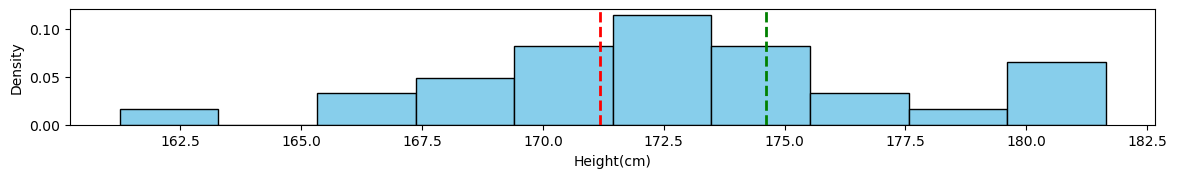

In [ ]:
plt.figure(figsize=(14, 1.5))
sns.histplot(sample, stat='density', facecolor="skyblue", bins=10)

# Add vertical lines for confidence interval
plt.axvline(lower_margin, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(upper_margin, color='green', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')
plt.show()

In [ ]:
from scipy.stats import norm, sem

# for n>30 we can work with the normal distribution
lower, upper = norm.interval(confidence=0.95, loc=np.mean(heights), scale=sem(heights))
print(lower, upper)

172.64264303531618 172.7623945646839


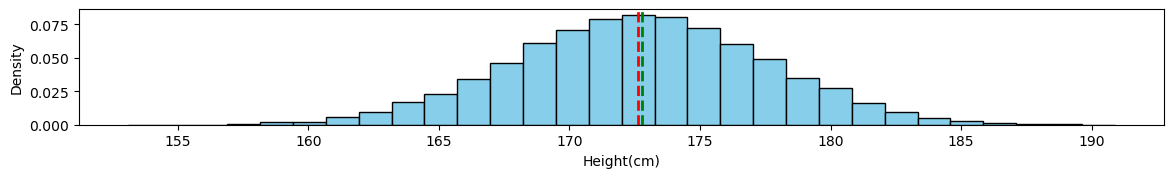

In [ ]:
plt.figure(figsize=(14, 1.5))
sns.histplot(heights, stat='density', facecolor="skyblue", bins=30)

# Add vertical lines for confidence interval
plt.axvline(lower, color='red', linestyle='dashed', linewidth=2, label='Lower Bound (95% CI)')
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2, label='Upper Bound (95% CI)')
plt.show()

## CI for variance
$$\left( \frac{{(n-1)s^2}}{{\chi^2_{\alpha/2, n-1}}}, \frac{{(n-1)s^2}}{{\chi^2_{1-\alpha/2, n-1}}} \right)$$

- $n$ is the sample size.
- $s^2$ is the sample variance.
- $α$ is the significance level (e.g., 0.05 for a 95% confidence interval).
- $\chi^2_{\alpha/2, n-1}​$ is the $α/2$ percentile of the chi-square distribution with $n−1$ degrees of freedom.
- $\chi^2_{1-\alpha/2, n-1}$​ is the $(1−α)/2$ percentile of the chi-square distribution with $n−1$ degrees of freedom.

In [ ]:
from scipy.stats import chi2

# Function to calculate confidence interval for variance
def ci_variance(data, confidence):
    n = len(data)
    var = np.var(data, ddof=1)  # sample variance with Bessel's correction
    chi2_lower = chi2.ppf((1 - confidence) / 2, df=n-1) # (1 - 0.95)/2 = 0.025
    chi2_upper = chi2.ppf((1 + confidence) / 2, df=n-1) # (1 + 0.95)/2 = 0.5 + 0.475 = 0.975
    lower = (n - 1) * var / chi2_upper
    upper = (n - 1) * var / chi2_lower
    return lower, upper


# Calculate the confidence interval for the variance
confidence = 0.95
conf_interval_variance = ci_variance(heights, confidence)
print(f"The {confidence*100}% confidence interval for variance is {conf_interval_variance}")

The 95.0% confidence interval for variance is (23.74616492927205, 23.74616492927205)


## CI for population proportion
$$\hat{p} \pm z_{\alpha/2} \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$

In [ ]:
from scipy.stats import norm

sample_proportion = 0.6  # Sample proportion
sample_size = 200  # Sample size
confidence_level = 0.95  # Desired confidence level

def ci_for_pop_proportion(p, n, confidence):
    standard_error = math.sqrt((p * (1 - p)) / n)

    # critical value for z alpha/2 
    z = norm.ppf((1 + confidence) / 2)

    # confidence interval
    lower_bound = p - z * standard_error
    upper_bound = p + z * standard_error

    return lower_bound, upper_bound

lower, upper = ci_for_pop_proportion(sample_proportion, sample_size, confidence_level)

print(f"Confidence Interval: ({lower:.4f}, {upper:.4f})")


Confidence Interval: (0.5321, 0.6679)


## Sample Size for population mean given a fixed margin or error and confidence level
$$n = \left(\frac{{z_{\alpha/2} \cdot \sigma}}{{\text{{margin of error}}}}\right)^2$$


In [ ]:
from scipy.stats import norm

'''A quality control manager may want to assess the average number of 
defectives in a box with a margin of error of plus minus 0.3 batteries and a 
confidence level of 95%, knowing the standard deviation to be 0.9 from past experiments'''

def ci_sample_size_for_pop_mean(confidence, moe, pop_std):
    z = norm.ppf((1 + confidence) / 2)
    sample_size = ((z * pop_std) / moe)**2
    return math.ceil(sample_size)


confidence_level = 0.95  # 95%
margin_of_error = 0.3  # 30%
std_dev = 0.9  # known standard deviation

# Calculate sample size
ci_sample_size_for_pop_mean(confidence_level, margin_of_error, std_dev)

35

## Sample Size Calculation for a Population Proportion 
$$n = \frac{{z_{\alpha/2}^2 \cdot p \cdot (1 - p)}}{{E^2}}$$


In [ ]:
from scipy.stats import norm 

def ci_sample_size_for_pop_proportion(moe, confidence_level, p=0.5):
    z = norm.ppf((1 + confidence_level) / 2)
    sample_size = ((z**2) * p * (1 - p)) / (moe**2)
    return math.ceil(sample_size)

margin_of_error = 0.03  # 3%
confidence_level = 0.95  # 95%

ci_sample_size_for_pop_proportion(margin_of_error, confidence_level)

1068

## Bootstrapping
- Bootstrap is the re-sampling (generating multiple resamples with replacement) strategy which replaces part of sample with the subsample of its own. The method involves repeatedly taking samples of size n (with replacement) from the original sample and calculating the value of the point estimate.
- Bootstraping is used to estimate and test the population parameters in situations where either the sampling distribution is unknown, the assumptions are violated or when you want to make inferences about a population from a limited sample.

In [ ]:
# Function to perform bootstrap sampling
def bootstrap(data, num_samples, statistic):
    bootstrap_samples_stat = []
    for _ in range(num_samples):
        sample = np.random.choice(data, len(data), replace=True)
        bootstrap_samples_stat.append(statistic(sample))
    return np.array(bootstrap_samples_stat)

# Perform bootstrapping and calculate statistics for each sample 
# generates 1000 different samples a 2500 elements and calculates their 1000 means
bootstrap_samples_stat = bootstrap(heights, num_samples=1000, statistic=np.mean)
print(bootstrap_samples_stat[:20])

[172.6940696 172.7079808 172.6778016 172.6414992 172.6756508 172.706126
 172.6618512 172.7463936 172.6807672 172.6639408 172.697384  172.695644
 172.7208272 172.6455096 172.6799136 172.6847236 172.7041972 172.747108
 172.6813644 172.6993648]


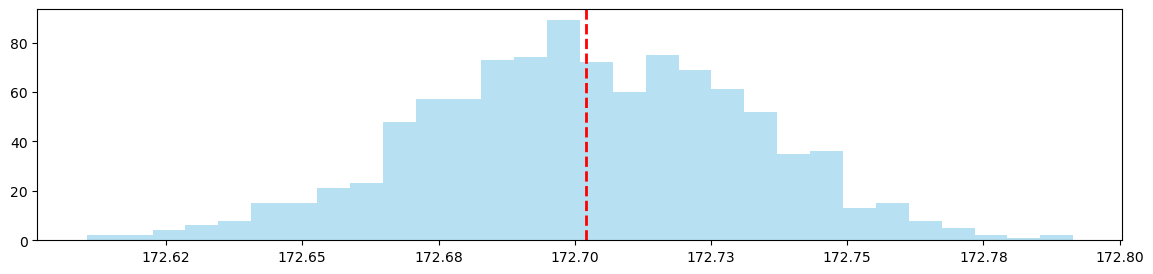

In [ ]:
# Histogram of the 100o means 
plt.figure(figsize=(14, 3))

plt.hist(bootstrap_samples_stat, bins=30, alpha=0.6, color='skyblue')

# Define a custom formatter to display two decimal digits
def two_decimal_formatter(x, pos):
    return f'{x:.2f}'

# Apply the custom formatter to the x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(two_decimal_formatter))

# Add line for the mean of means
plt.axvline(np.mean(bootstrap_samples_stat), color='r', linestyle='dashed', linewidth=2)
plt.show()

## Confidence Interval - Excercises

In [ ]:
sales = pd.read_csv("data/store_sales.csv")
sales.head()
sales.describe()

,Store ID,Grocery Sales,Clothing Sales,Toy Sales,Total Sales
count,100.000000,100.000000,100.000000,100.000000,0.0
mean,50.500000,32757.540000,28129.680000,9841.110000,NaN
std,29.011492,7120.180984,10396.542361,3451.428414,NaN
min,1.000000,16033.000000,1125.000000,2460.000000,NaN
25%,25.750000,28380.750000,22105.750000,7272.250000,NaN
50%,50.500000,33060.500000,29203.500000,9716.000000,NaN
75%,75.250000,36373.500000,34149.500000,12092.750000,NaN
max,100.000000,57755.000000,51067.000000,18650.000000,NaN


In [ ]:
'''Estimate the average grocery sales for all stores, of we have only data of 100 stores. 
Calculate the absolute t_a/2 values for a 95% confidence interval for grocery sales'''
grocery = sales["Grocery Sales"]

t_0975 = scipy.stats.t.ppf((1 + 0.95) / 2., len(grocery) - 1).round(4)

In [ ]:
def margin_of_error_t(data, confidence=0.95):
    t_value = scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    moe = t_value + sem(data)
    return moe

'''what is the corresponding margin of error = t_a/2 + standard error of the mean'''

clothing = sales["Clothing Sales"]
toys = sales["Toy Sales"]


margin_of_error_t(toys)
margin_of_error_t(clothing)
margin_of_error_t(grocery)

714.0023153226673

In [ ]:
'''what would the sample size need to be to bring the moe of clothing as near as possible to the moe of toys'''
moe_toys = margin_of_error_t(toys)
mean_clothing = np.mean(clothing)

def sample_size_t(data, confidence, moe):
    sample_std = np.std(data)
    t_value = scipy.stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    sample_size = ((t_value * sample_std) / moe)**2
    return math.ceil(sample_size)

sample_size_t(clothing, 0.95, moe_toys)

3497

In [ ]:
toys.describe()

count      100.000000
mean      9841.110000
std       3451.428414
min       2460.000000
25%       7272.250000
50%       9716.000000
75%      12092.750000
max      18650.000000
Name: Toy Sales, dtype: float64

In [ ]:
from scipy.stats import t, sem
# 95% confidence interval for population mean for toy sales
ci_95 = t.interval(0.95, df=len(toys)-1, loc=np.mean(toys), scale=sem(toys))

# 90% confidence interval for population mean for toy sales
ci_90 = t.interval(0.90, df=len(toys)-1, loc=np.mean(toys), scale=sem(toys))

In [ ]:
# no. of sales in the 95% confidence interval
len([x for x in toys if  ci_95[0] <= x <= ci_95[1]])
((toys>=ci_95[0]) & (toys<=ci_95[1])).sum()

# no. of sales in the 90% confidence interval
len([x for x in toys if  ci_90[0] <= x <= ci_90[1]])

15

In [ ]:
# total sales
sales["Total Sales"] = sales.iloc[:, 1:4].sum(axis=1)

In [ ]:
# calculate the sample proportion p of grocery sales
sales["Proportion of Grocery Sales"] = sales["Grocery Sales"] / sales["Total Sales"]
p_grocery = sales["Proportion of Grocery Sales"].mean()
p_grocery

0.47063844072360406

In [ ]:
# 95% confidence interval for population proportion
from stats_functions import ci_for_pop_proportion
ci_for_pop_proportion(p_grocery, len(grocery), 0.95)

(0.3728093561395167, 0.5684675253076914)

In [ ]:
from stats_functions import sample_size_for_pop_proportion_ci
sample_size_for_pop_proportion_ci(0.07, 0.95)

196

In [ ]:
# cut off value for mu <= 7.5, with n=100, alpha=0.05
scipy.stats.t.ppf(0.95, 99).round(4)

1.6604

In [ ]:
# z-statistic for a proportion 
p=0.4
p_hat=0.35
n=100

z = (p_hat - p) / math.sqrt((p*(1-p))/n)
round(z, 2)

-1.02